#**TAPIWA MESA**

#**Stock price prediction using LSTM on the Zimbabwe Stock Exchange (ZSE)**

#**FINAL VIVA PRESENTATION**

### **Problem Statement**

The problem at hand in the Zimbabwean circular economy is the uncertainty in economic policies and activities, that is driven by fundamental economics that inherently presents a challenge in the consistence and reliability of the technical analytics of time series econometrics. These fundamental approaches influence and inform decision making among investors which in many instances are short term investments decisions. This in turn results in the natural development of a risk averse investment community, which will perpetually affect money circulation and business’s diversification and growth as little to no money in invested through the ZSE.

The adoption of the LSTM and RNN machine learning algorithms in the Zimbabwean context will in the long run instill a sense of confidence and reliance and trust in big data science technologies. The LSTM model considers financial history of a counter or stock on the Zimbabwean Stock Exchange, considering seasonal and non-seasonal time series components and cyclical. The effects on the 2008 financial crisis, the devaluation of the Zimbabwean dollar, the adoption of the multi-currency regime, all these policies and economic instances are captured in machine learning model and algorithms are developed, sense checked tested to make accurate stock prices prediction. Machine Learning proffers a solution to these problems in the investment community, provides sustainable and alternative decision-making systems as far as stock market investments is concerned.

### **Aim**

The aim of this study is to develop a machine learning model that predicts stock prices on the Zimbabwe Stock Exchange.

### **Objectives**

1. To perform Expletory Data Analysis of the selected stocks on the ZSE to gain insights into the distribution of the data.
2. To predict the future prices of the selected shares from the ZSE.
3. To comparatively test the models built with different parameters and adopt the one with more prediction accuracy.
4. To visualize results of the optimal models

####**Methodology**

CRISP-DM, Cross Industry Standard Process for Data Mining’s phases are business and data understanding, data preparation, modeling, evaluation, and deployment. This methodology was originally developed in IBM for Data Mining tasks it is useful for almost all the data science projects. The order of the stages is not precise, and it is often necessary to move back and forth between the different stages. After the solution is deployed, the data mining process continues. Lessons learned during the process can trigger new, more focused business questions, and subsequent data mining processes can benefit from the experience of previous ones.

The flow chart below illustrates the stages in CRSP-DM

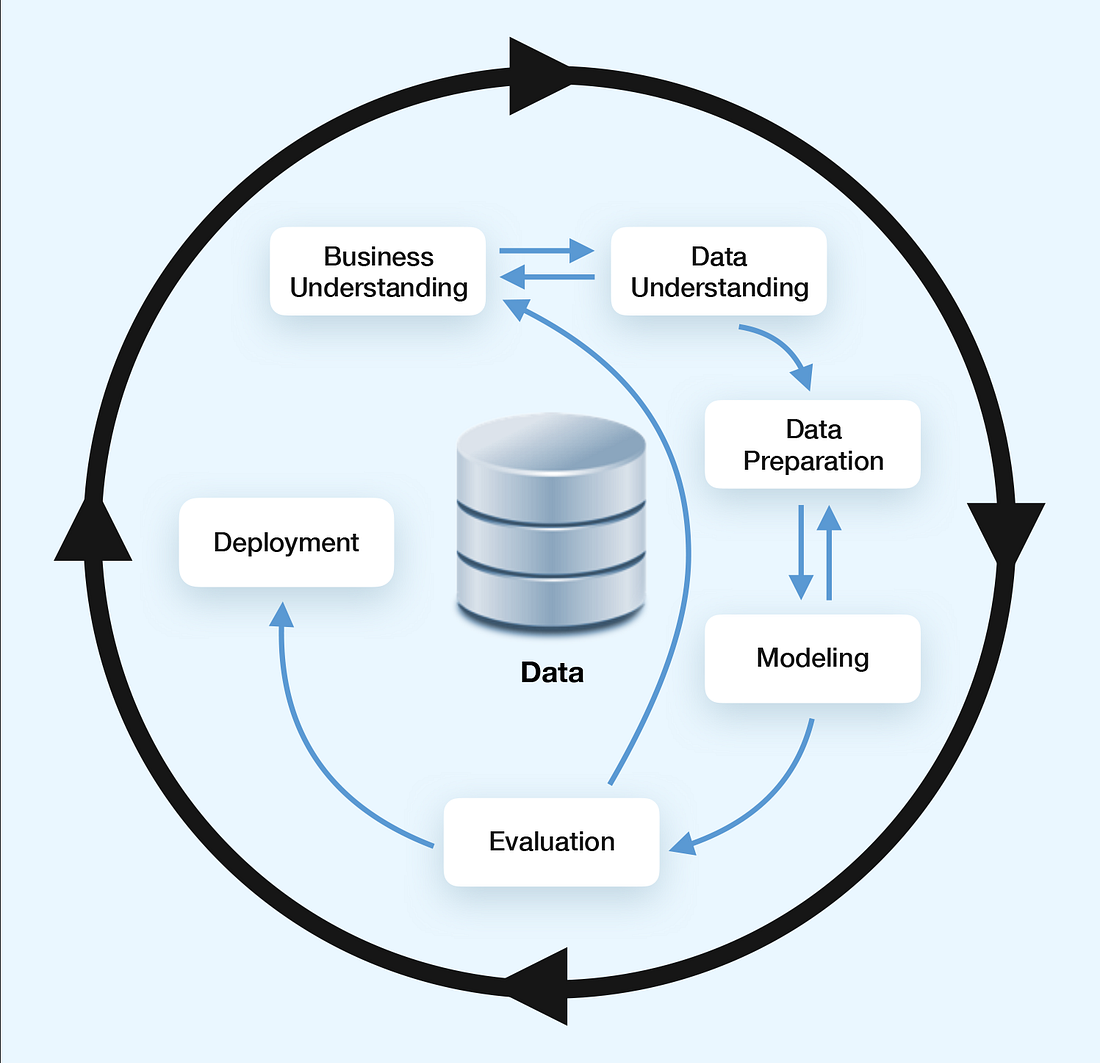

###Model Design & Implementation


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Mount Google Drive (if the file is stored in Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Top 4 Dataset.csv'  # Update with the actual file path
dataset = pd.read_csv(file_path)

# Display the dataset
print(dataset.head())


Mounted at /content/drive
       DATE  DELTA  SEEDCO  SIMBISA  NATFOODS
0  1/2/2020   3.41    1.60     1.26      9.01
1  1/3/2020   3.46    1.61     1.26      9.01
2  1/7/2020   3.46    1.61     1.26      9.00
3  1/8/2020   3.46    1.50     1.26      9.00
4  1/9/2020   3.45    1.50     1.26      9.00


### Sorting the index data type

In [ ]:
data = dataset.set_index(dataset['DATE'])

In [ ]:
data.drop('DATE', axis = 1, inplace = True)

In [ ]:
data.head()

,DELTA,SEEDCO,SIMBISA,NATFOODS
DATE,,,,
1/2/2020,3.41,1.60,1.26,9.01
1/3/2020,3.46,1.61,1.26,9.01
1/7/2020,3.46,1.61,1.26,9.00
1/8/2020,3.46,1.50,1.26,9.00
1/9/2020,3.45,1.50,1.26,9.00


In [ ]:
data.index = pd.to_datetime(data.index, format = '%m/%d/%Y')

In [ ]:
data.head()

,DELTA,SEEDCO,SIMBISA,NATFOODS
DATE,,,,
2020-01-02,3.41,1.60,1.26,9.01
2020-01-03,3.46,1.61,1.26,9.01
2020-01-07,3.46,1.61,1.26,9.00
2020-01-08,3.46,1.50,1.26,9.00
2020-01-09,3.45,1.50,1.26,9.00


### Defining the variable names for the stock data

In [ ]:
# Defining our stocks
Delta = data['DELTA']
Seedco = data['SEEDCO']
Simbisa = data['SIMBISA']
Natfoods = data['NATFOODS']

### The historical prices plotting function

In [ ]:
# Defining a function that plots graphs

def plotting_graph(stock):
    # list of dates and corresponding prices
    dates = stock.index
    prices = stock.values.tolist()

    # Convert the dates to matplotlib date format
    formatted_dates = mdates.date2num(dates)

    # Plot the time series
    plt.plot(formatted_dates, prices)

    # Set the x-axis format to display dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set the plot title and labels
    plt.title('Historical Closing Prices for ' + stock.name)
    plt.xlabel('Date')
    plt.ylabel('Price')

    # Display the plot
    plt.tight_layout()

    return plt.show()

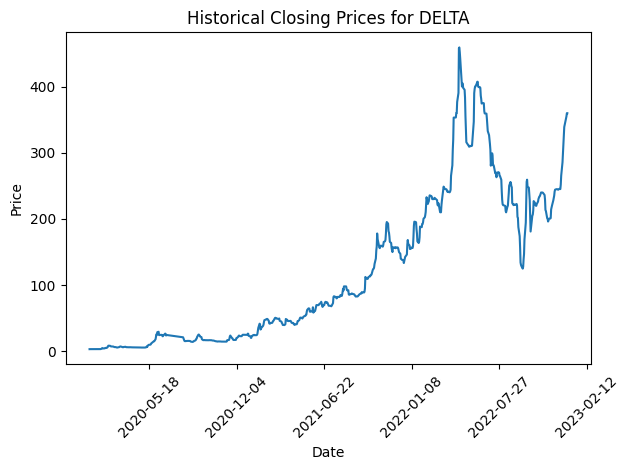

In [ ]:
plotting_graph(Delta)

# **LSTM Model Design**

# Building the Model for the DELTA Stock

### Exctrating the stock data

In [ ]:
# Extracting the closing prices & dates for delta stock

closing_prices = Delta.values.reshape(-1, 1)
dates = Delta.index.to_numpy().reshape(-1,1)

### Defining the Epoch and lookback

In [ ]:
# Define the parameters

iterations = 100
window_size = 7
dropout_rate = 0.2

### Data Preprocessing

In [ ]:
# Defining the scaler function
scaler = MinMaxScaler(feature_range=(0, 1))

# Split the data into training and testing sets
train_size = int(len(closing_prices) * 0.8)
val_size = int(len(closing_prices) * 0.9)

train_data = closing_prices[:train_size]
val_data = closing_prices[train_size:val_size]
test_data = closing_prices[val_size:]

# Scale the data
scaled_train_data = scaler.fit_transform(train_data)
scaled_val_data = scaler.fit_transform(val_data)
scaled_test_data = scaler.fit_transform(test_data)

# Prepare the scaled training data
X_train, y_train = [], []
for i in range(window_size, len(scaled_train_data)):
    X_train.append(scaled_train_data[i - window_size:i, 0])
    y_train.append(scaled_train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Prepare the scaled validation data
X_val, y_val = [], []
for i in range(window_size, len(scaled_val_data)):
    X_val.append(scaled_val_data[i - window_size:i, 0])
    y_val.append(scaled_val_data[i, 0])
X_val, y_val = np.array(X_val), np.array(y_val)

# Prepare the scaled testing data
X_test, y_test = [], []
for i in range(window_size, len(scaled_test_data)):
    X_test.append(scaled_test_data[i - window_size:i, 0])
    y_test.append(scaled_test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building the LSTM Model

In [ ]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(dropout_rate))
model.add(LSTM(50))
model.add(Dropout(dropout_rate))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error')
historical = model.fit(X_train, y_train, epochs = iterations, batch_size = 32)

Epoch 1/100
18/18 [==============================] - 3s 6ms/step - loss: 0.0976
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0310
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0256
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0263
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0235
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0235
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0220
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0234
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0221
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0217
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0218
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0213
Epoch 13/100
18/18 [=================

### Plotting the Training Loss Function

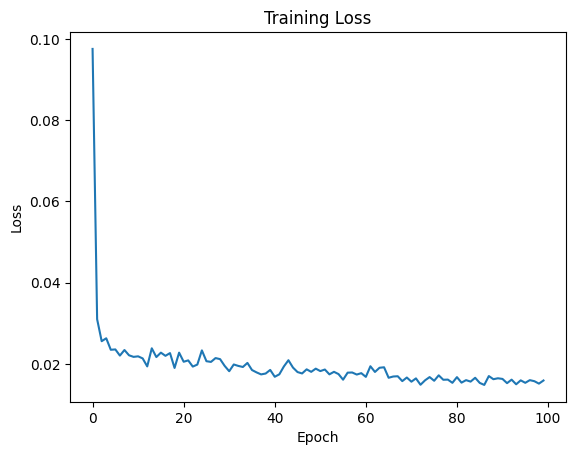

In [ ]:
# Plotting the training loss
plt.figure()
plt.plot(historical.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Model Summary

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 7, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 7, 50)             0         
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


### Validating the model

3/3 [==============================] - 1s 3ms/step


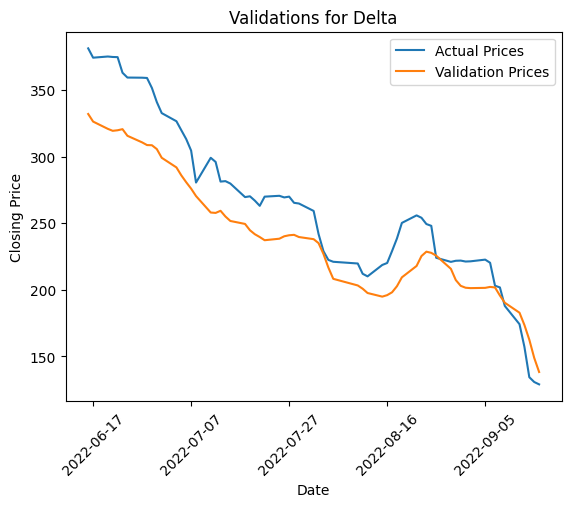

In [ ]:
# Making predictions on the validation data
validations = model.predict(X_val)
validations = scaler.inverse_transform(validations)

# Converted dates to matplotlib date format
trimmed_dates = dates[train_size + window_size:val_size]
formatted_dates = mdates.date2num(trimmed_dates)

trimmed_actual_prices = closing_prices[train_size + window_size:val_size]

# Plot the prediction and actual prices
plt.figure()
plt.plot(formatted_dates, trimmed_actual_prices, label='Actual Prices')
plt.plot(formatted_dates, validations, label='Validation Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Validations for Delta')
plt.legend()

# Setting the x-axis format to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [ ]:
metrics = model.evaluate(X_val, y_val)
print('Mean Absolute Error:', metrics)

3/3 [==============================] - 1s 4ms/step - loss: 0.0326
Mean Absolute Error: 0.03264943137764931


### Making Predictions on the Test Dataset

3/3 [==============================] - 0s 4ms/step


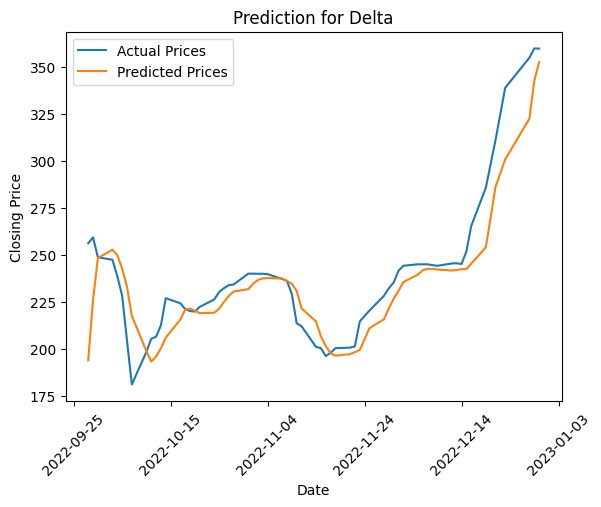

In [ ]:
# Making predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

test_dates = dates[val_size + window_size:]
formatted_dates = mdates.date2num(test_dates)

trimmed_actual_test_prices = closing_prices[val_size + window_size:]

# Plot the test and actual prices
plt.figure()
plt.plot(formatted_dates, trimmed_actual_test_prices, label='Actual Prices')
plt.plot(formatted_dates, predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Prediction for Delta')
plt.legend()

# Setting the x-axis format to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [ ]:
metrics = model.evaluate(X_test, y_test)
print('Mean Absolute Error:', metrics)

3/3 [==============================] - 0s 4ms/step - loss: 0.0464
Mean Absolute Error: 0.046390339732170105


# Building the Model for the SEEDCO Stock

### Extracting the Data

In [ ]:
# Extracting the closing prices & dates for seedco stock

closing_prices = Seedco.values.reshape(-1, 1)
dates = Seedco.index.to_numpy().reshape(-1,1)

### Defining the Epoch and Lookback

In [ ]:
# Define the parameters

iterations = 100
window_size = 28
dropout_rate = 0.2

### Data Preprocessing

In [ ]:
# Defining the scaler function
scaler = MinMaxScaler(feature_range=(0, 1))

# Split the data into training and testing sets
train_size = int(len(closing_prices) * 0.8)
val_size = int(len(closing_prices) * 0.9)

train_data = closing_prices[:train_size]
val_data = closing_prices[train_size:val_size]
test_data = closing_prices[val_size:]

# Scale the data
scaled_train_data = scaler.fit_transform(train_data)
scaled_val_data = scaler.fit_transform(val_data)
scaled_test_data = scaler.fit_transform(test_data)

# Prepare the scaled training data
X_train, y_train = [], []
for i in range(window_size, len(scaled_train_data)):
    X_train.append(scaled_train_data[i - window_size:i, 0])
    y_train.append(scaled_train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Prepare the scaled validation data
X_val, y_val = [], []
for i in range(window_size, len(scaled_val_data)):
    X_val.append(scaled_val_data[i - window_size:i, 0])
    y_val.append(scaled_val_data[i, 0])
X_val, y_val = np.array(X_val), np.array(y_val)

# Prepare the scaled testing data
X_test, y_test = [], []
for i in range(window_size, len(scaled_test_data)):
    X_test.append(scaled_test_data[i - window_size:i, 0])
    y_test.append(scaled_test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building the LSTM Model

In [ ]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(dropout_rate))
model.add(LSTM(50))
model.add(Dropout(dropout_rate))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error')
historical = model.fit(X_train, y_train, epochs = iterations, batch_size = 32)

Epoch 1/100
18/18 [==============================] - 6s 54ms/step - loss: 0.1129
Epoch 2/100
18/18 [==============================] - 1s 41ms/step - loss: 0.0382
Epoch 3/100
18/18 [==============================] - 1s 36ms/step - loss: 0.0350
Epoch 4/100
18/18 [==============================] - 1s 35ms/step - loss: 0.0324
Epoch 5/100
18/18 [==============================] - 1s 36ms/step - loss: 0.0360
Epoch 6/100
18/18 [==============================] - 1s 34ms/step - loss: 0.0351
Epoch 7/100
18/18 [==============================] - 1s 36ms/step - loss: 0.0314
Epoch 8/100
18/18 [==============================] - 1s 34ms/step - loss: 0.0403
Epoch 9/100
18/18 [==============================] - 1s 34ms/step - loss: 0.0303
Epoch 10/100
18/18 [==============================] - 1s 35ms/step - loss: 0.0272
Epoch 11/100
18/18 [==============================] - 1s 32ms/step - loss: 0.0280
Epoch 12/100
18/18 [==============================] - 1s 33ms/step - loss: 0.0344
Epoch 13/100
18/18 [=====

### Plotting the training Loss Function

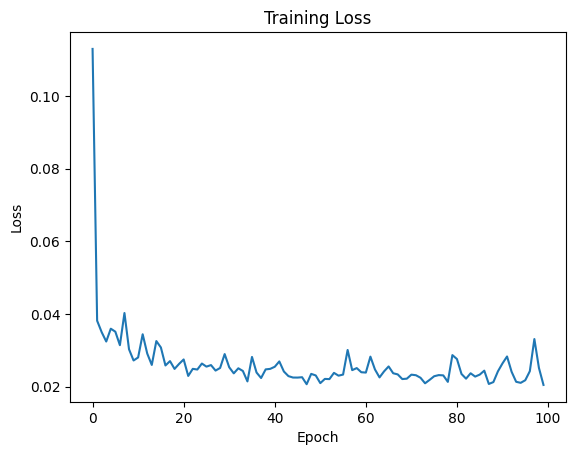

In [ ]:
# Plotting the training loss
plt.figure()
plt.plot(historical.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Validating the Model

2/2 [==============================] - 1s 10ms/step


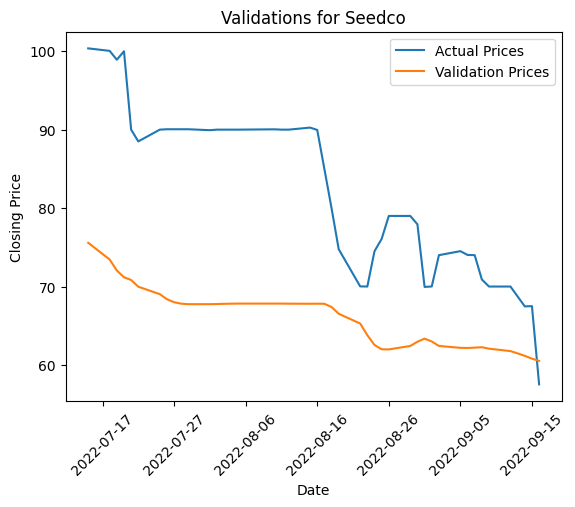

In [ ]:
# Making predictions on the validation data
validations = model.predict(X_val)
validations = scaler.inverse_transform(validations)

# Converted dates to matplotlib date format
trimmed_dates = dates[train_size + window_size:val_size]
formatted_dates = mdates.date2num(trimmed_dates)

trimmed_actual_prices = closing_prices[train_size + window_size:val_size]

# Plot the prediction and actual prices
plt.figure()
plt.plot(formatted_dates, trimmed_actual_prices, label='Actual Prices')
plt.plot(formatted_dates, validations, label='Validation Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Validations for Seedco')
plt.legend()

# Setting the x-axis format to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

### Evaluating the Model

In [ ]:
metrics = model.evaluate(X_val, y_val)
print('Mean Absolute Error:', metrics)

2/2 [==============================] - 1s 14ms/step - loss: 0.0221
Mean Absolute Error: 0.022079164162278175


### Making Predictions on the Test Dataset

2/2 [==============================] - 0s 10ms/step


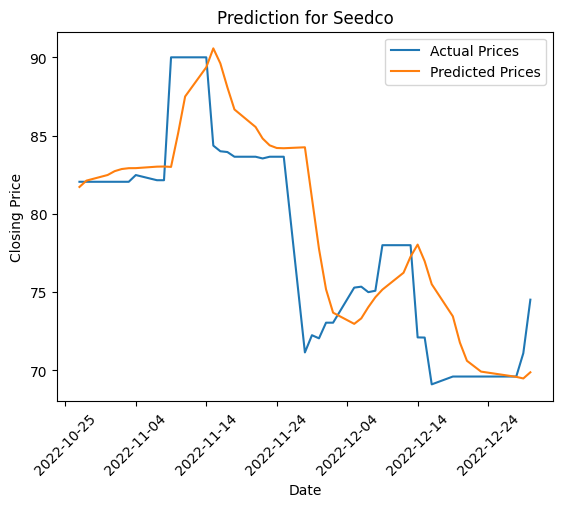

In [ ]:
# Making predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

test_dates = dates[val_size + window_size:]
formatted_dates = mdates.date2num(test_dates)

trimmed_actual_test_prices = closing_prices[val_size + window_size:]

# Plot the test and actual prices
plt.figure()
plt.plot(formatted_dates, trimmed_actual_test_prices, label='Actual Prices')
plt.plot(formatted_dates, predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Prediction for Seedco')
plt.legend()

# Setting the x-axis format to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

### Evaluating the Predictions

In [ ]:
metrics = model.evaluate(X_test, y_test)
print('Mean Absolute Error:', metrics)

2/2 [==============================] - 0s 14ms/step - loss: 0.0473
Mean Absolute Error: 0.04728509113192558


# Building the Model for the SIMBISA Stock

### Extracting the data

In [ ]:
# Extracting the closing prices & dates for Simbisa stock

closing_prices = Simbisa.values.reshape(-1, 1)
dates = Simbisa.index.to_numpy().reshape(-1,1)

### Defining the epoch and lookback

In [ ]:
# Define the parameters

iterations = 100
window_size = 14
dropout_rate = 0.2

### Data Preprocessing

In [ ]:
# Defining the scaler function
scaler = MinMaxScaler(feature_range=(0, 1))

# Split the data into training and testing sets
train_size = int(len(closing_prices) * 0.8)
val_size = int(len(closing_prices) * 0.9)

train_data = closing_prices[:train_size]
val_data = closing_prices[train_size:val_size]
test_data = closing_prices[val_size:]

# Scale the data
scaled_train_data = scaler.fit_transform(train_data)
scaled_val_data = scaler.fit_transform(val_data)
scaled_test_data = scaler.fit_transform(test_data)

# Prepare the scaled training data
X_train, y_train = [], []
for i in range(window_size, len(scaled_train_data)):
    X_train.append(scaled_train_data[i - window_size:i, 0])
    y_train.append(scaled_train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Prepare the scaled validation data
X_val, y_val = [], []
for i in range(window_size, len(scaled_val_data)):
    X_val.append(scaled_val_data[i - window_size:i, 0])
    y_val.append(scaled_val_data[i, 0])
X_val, y_val = np.array(X_val), np.array(y_val)

# Prepare the scaled testing data
X_test, y_test = [], []
for i in range(window_size, len(scaled_test_data)):
    X_test.append(scaled_test_data[i - window_size:i, 0])
    y_test.append(scaled_test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building the LSTM Model

In [ ]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(dropout_rate))
model.add(LSTM(50))
model.add(Dropout(dropout_rate))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error')
historical = model.fit(X_train, y_train, epochs = iterations, batch_size = 32)

Epoch 1/100
18/18 [==============================] - 5s 32ms/step - loss: 0.0705
Epoch 2/100
18/18 [==============================] - 1s 31ms/step - loss: 0.0311
Epoch 3/100
18/18 [==============================] - 1s 31ms/step - loss: 0.0278
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 0.0225
Epoch 5/100
18/18 [==============================] - 1s 31ms/step - loss: 0.0251
Epoch 6/100
18/18 [==============================] - 1s 28ms/step - loss: 0.0248
Epoch 7/100
18/18 [==============================] - 0s 21ms/step - loss: 0.0242
Epoch 8/100
18/18 [==============================] - 0s 19ms/step - loss: 0.0238
Epoch 9/100
18/18 [==============================] - 0s 19ms/step - loss: 0.0231
Epoch 10/100
18/18 [==============================] - 0s 20ms/step - loss: 0.0215
Epoch 11/100
18/18 [==============================] - 0s 19ms/step - loss: 0.0219
Epoch 12/100
18/18 [==============================] - 0s 20ms/step - loss: 0.0183
Epoch 13/100
18/18 [=====

### Plotting the Loss Function

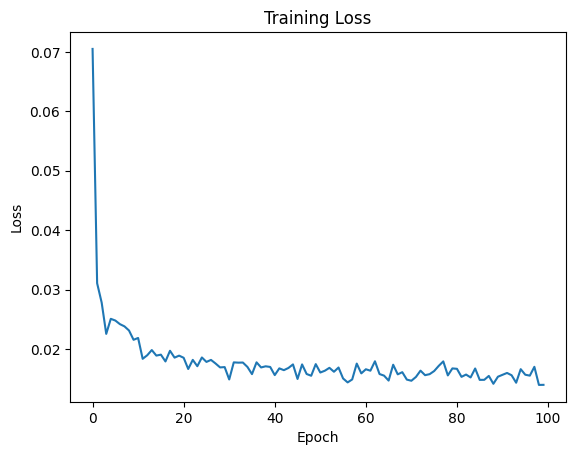

In [ ]:
# Plotting the training loss
plt.figure()
plt.plot(historical.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Validating the Model

2/2 [==============================] - 1s 11ms/step


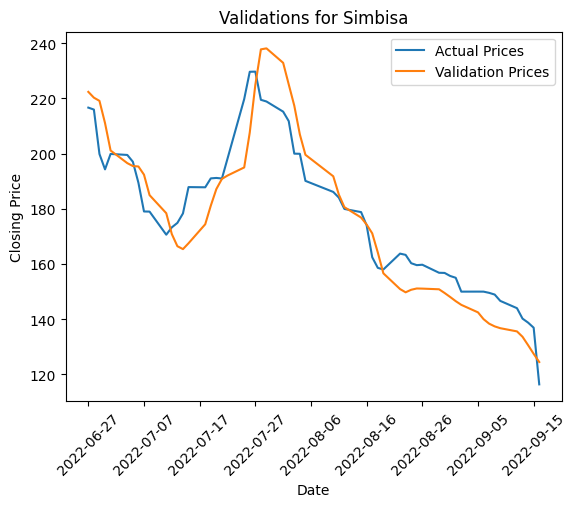

In [ ]:
# Making predictions on the validation data
validations = model.predict(X_val)
validations = scaler.inverse_transform(validations)

# Converted dates to matplotlib date format
trimmed_dates = dates[train_size + window_size:val_size]
formatted_dates = mdates.date2num(trimmed_dates)

trimmed_actual_prices = closing_prices[train_size + window_size:val_size]

# Plot the prediction and actual prices
plt.figure()
plt.plot(formatted_dates, trimmed_actual_prices, label='Actual Prices')
plt.plot(formatted_dates, validations, label='Validation Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Validations for Simbisa')
plt.legend()

# Setting the x-axis format to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

### Evaluating the Model

In [ ]:
metrics = model.evaluate(X_val, y_val)
print('Mean Absolute Error:', metrics)

2/2 [==============================] - 1s 14ms/step - loss: 0.0540
Mean Absolute Error: 0.053983721882104874


### Making Predictions on the test dataset

2/2 [==============================] - 0s 10ms/step


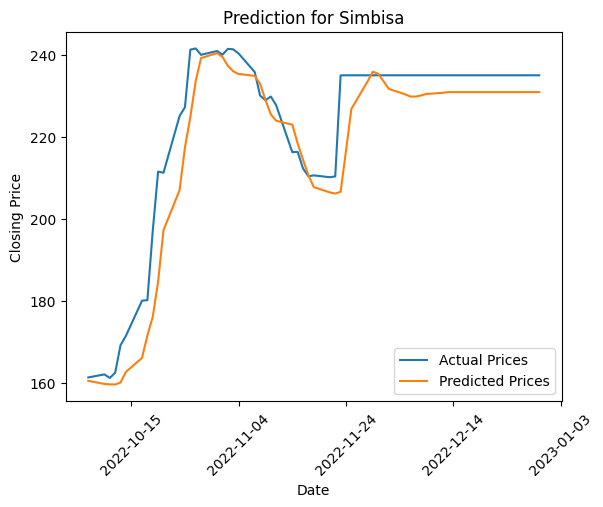

In [ ]:
# Making predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

test_dates = dates[val_size + window_size:]
formatted_dates = mdates.date2num(test_dates)

trimmed_actual_test_prices = closing_prices[val_size + window_size:]

# Plot the test and actual prices
plt.figure()
plt.plot(formatted_dates, trimmed_actual_test_prices, label='Actual Prices')
plt.plot(formatted_dates, predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Prediction for Simbisa')
plt.legend()

# Setting the x-axis format to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

### Evaluating the Predictions

In [ ]:
metrics = model.evaluate(X_test, y_test)
print('Mean Absolute Error:', metrics)

# Building the Model for the NATFOODS Stock

### Extracting the data

In [ ]:
# Extracting the closing prices & dates for National Foods stock

closing_prices = Natfoods.values.reshape(-1, 1)
dates = Natfoods.index.to_numpy().reshape(-1,1)

### Defining the epoch and lookback

In [ ]:
# Define the parameters

iterations = 100
window_size = 14
dropout_rate = 0.2

### Data Preprocessing

In [ ]:
# Defining the scaler function
scaler = MinMaxScaler(feature_range=(0, 1))

# Split the data into training and testing sets
train_size = int(len(closing_prices) * 0.8)
val_size = int(len(closing_prices) * 0.9)

train_data = closing_prices[:train_size]
val_data = closing_prices[train_size:val_size]
test_data = closing_prices[val_size:]

# Scale the data
scaled_train_data = scaler.fit_transform(train_data)
scaled_val_data = scaler.fit_transform(val_data)
scaled_test_data = scaler.fit_transform(test_data)

# Prepare the scaled training data
X_train, y_train = [], []
for i in range(window_size, len(scaled_train_data)):
    X_train.append(scaled_train_data[i - window_size:i, 0])
    y_train.append(scaled_train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Prepare the scaled validation data
X_val, y_val = [], []
for i in range(window_size, len(scaled_val_data)):
    X_val.append(scaled_val_data[i - window_size:i, 0])
    y_val.append(scaled_val_data[i, 0])
X_val, y_val = np.array(X_val), np.array(y_val)

# Prepare the scaled testing data
X_test, y_test = [], []
for i in range(window_size, len(scaled_test_data)):
    X_test.append(scaled_test_data[i - window_size:i, 0])
    y_test.append(scaled_test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### The building the LSTM Model

In [ ]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(dropout_rate))
model.add(LSTM(50))
model.add(Dropout(dropout_rate))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error')
historical = model.fit(X_train, y_train, epochs = iterations, batch_size = 32)

Epoch 1/100
18/18 [==============================] - 6s 22ms/step - loss: 0.1262
Epoch 2/100
18/18 [==============================] - 0s 24ms/step - loss: 0.0445
Epoch 3/100
18/18 [==============================] - 0s 21ms/step - loss: 0.0407
Epoch 4/100
18/18 [==============================] - 0s 21ms/step - loss: 0.0384
Epoch 5/100
18/18 [==============================] - 0s 21ms/step - loss: 0.0344
Epoch 6/100
18/18 [==============================] - 0s 21ms/step - loss: 0.0342
Epoch 7/100
18/18 [==============================] - 0s 21ms/step - loss: 0.0345
Epoch 8/100
18/18 [==============================] - 0s 21ms/step - loss: 0.0311
Epoch 9/100
18/18 [==============================] - 0s 21ms/step - loss: 0.0327
Epoch 10/100
18/18 [==============================] - 0s 21ms/step - loss: 0.0340
Epoch 11/100
18/18 [==============================] - 0s 24ms/step - loss: 0.0308
Epoch 12/100
18/18 [==============================] - 0s 21ms/step - loss: 0.0280
Epoch 13/100
18/18 [=====

### Plotting the Loss Function

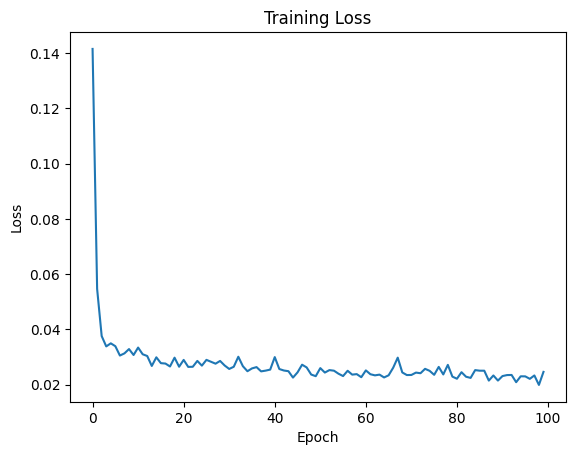

In [ ]:
# Plotting the training loss
plt.figure()
plt.plot(historical.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Validating the Model

2/2 [==============================] - 1s 11ms/step


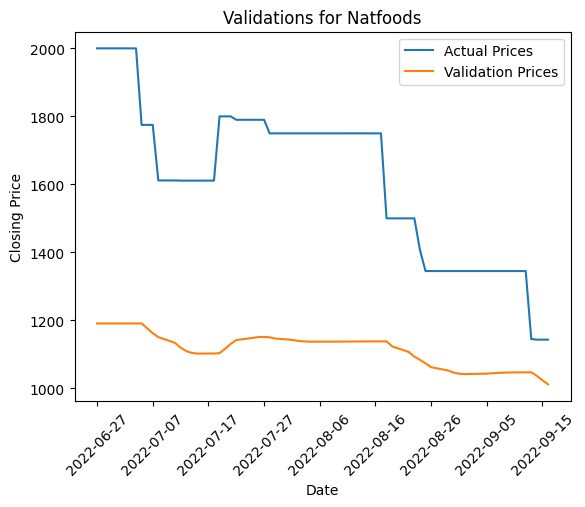

In [ ]:
# Making predictions on the validation data
validations = model.predict(X_val)
validations = scaler.inverse_transform(validations)

# Converted dates to matplotlib date format
trimmed_dates = dates[train_size + window_size:val_size]
formatted_dates = mdates.date2num(trimmed_dates)

trimmed_actual_prices = closing_prices[train_size + window_size:val_size]

# Plot the prediction and actual prices
plt.figure()
plt.plot(formatted_dates, trimmed_actual_prices, label='Actual Prices')
plt.plot(formatted_dates, validations, label='Validation Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Validations for Stock')
plt.legend()

# Setting the x-axis format to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

### Evaluating the Model

In [ ]:
metrics = model.evaluate(X_val, y_val)
print('Mean Absolute Error:', metrics)

2/2 [==============================] - 1s 11ms/step - loss: 0.0654
Mean Absolute Error: 0.06540585309267044


### Making Predictions on the test dataset

2/2 [==============================] - 0s 10ms/step


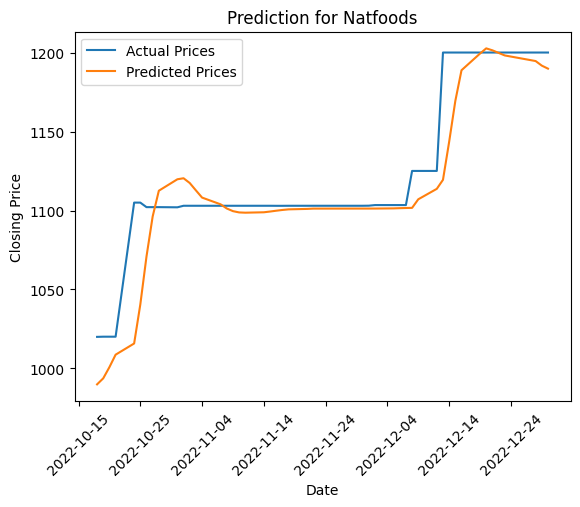

In [ ]:
# Making predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

test_dates = dates[val_size + window_size:]
formatted_dates = mdates.date2num(test_dates)

trimmed_actual_test_prices = closing_prices[val_size + window_size:]

# Plot the test and actual prices
plt.figure()
plt.plot(formatted_dates, trimmed_actual_test_prices, label='Actual Prices')
plt.plot(formatted_dates, predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Prediction for Natfoods')
plt.legend()

# Setting the x-axis format to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

### Evaluating the Predictions

In [ ]:
metrics = model.evaluate(X_test, y_test)
print('Mean Absolute Error:', metrics)